Load dataset

In [2]:
import pandas as pd 
iris = pd.read_csv(r'C:\Users\jakub.kalka\Downloads\Graduate - IRISES dataset (2019-06).csv', '|')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


check datatypes

In [8]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width      object
Species          object
dtype: object

convert Petal Width to float

In [11]:
iris['Petal.Width'] = pd.to_numeric(iris['Petal.Width'],errors='coerce')
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

data shape

In [5]:
iris.shape

(150, 5)

statistical data description 

In [12]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,150.000000,149.000000
mean,5.779333,3.061745,3.758000,1.192617
std,1.197721,0.433963,1.765298,0.760343
min,-4.800000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Remove -4.8 value and NaN value (for Sepal.Width and Petal.Width, it's only 2 value, if we have more na values we can use interpolation )

In [43]:
iris['Sepal.Length'] = iris['Sepal.Length'].abs()
iris = iris.dropna()
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,148.000000,148.000000,148.000000,148.000000
mean,5.841892,3.063514,3.745946,1.193919
std,0.831932,0.434898,1.770713,0.762758
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


distribution of type

In [44]:
iris.groupby('Species').size()

Species
setosa        50
versicolor    49
virginica     49
dtype: int64

classification by sepal

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


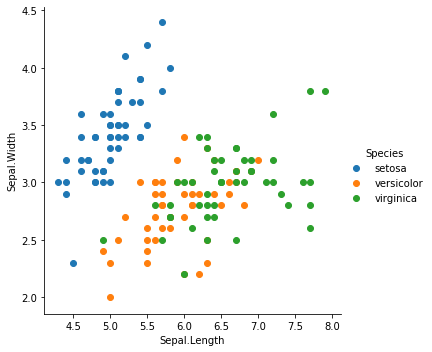

In [46]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "Sepal.Length", "Sepal.Width") \
   .add_legend()

classification by petal

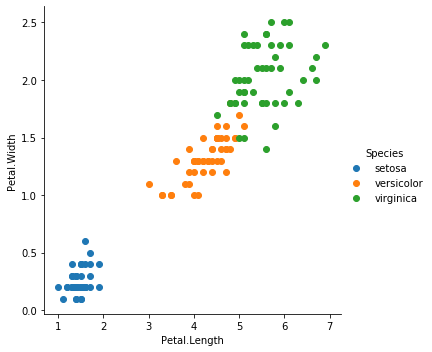

In [47]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "Petal.Length", "Petal.Width") \
   .add_legend()

correlation between variables

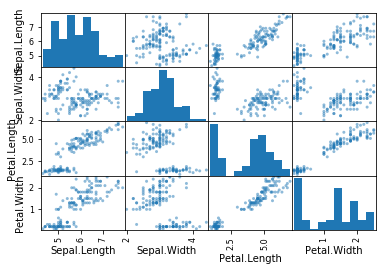

In [48]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris)
plt.show()

After visualising, it's time to create model, first step will be spliting data to train and test dataset(becasue dataset is small, data will be split 0.9/0.1

In [32]:
from sklearn import model_selection

c:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
c:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [85]:
value = iris.values
X = value[:,0:4]
Y = value[:,4]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.15, random_state=7)

Create metrics to compare model

First model is kNN (k-Nearest Neighbors)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, predictions)
knn_accuracy

0.9130434782608695

Next model is Support Vector Classifcation

In [87]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
svc_accuracy = accuracy_score(y_test, predictions)
svc_accuracy

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8695652173913043

next Model is Logistic Regression 

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
lr_accuracy = accuracy_score(y_test, predictions)
lr_accuracy

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.782608695652174

Last model is Random Forest Classifcation

In [89]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
rf_accuracy = accuracy_score(y_test, predictions)
rf_accuracy

0.8695652173913043

In [94]:
compare_models = pd.DataFrame({
    'kNN': [knn_accuracy],
    'SVC': [svc_accuracy],
    'Logistic Regression': [lr_accuracy],
    'Random Forest': [rf_accuracy]    
})
compare_models

,kNN,SVC,Logistic Regression,Random Forest
0,0.913043,0.869565,0.782609,0.869565


Model with the best accuracy is kNN. This model should be use to get new predictons. For a better model standardization may have been used or other classifaction model. Other measures of the model can be used.